C:\Users\Caio\AppData\Local\Temp\ipykernel_52740\1658699319.py:86: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'N/A' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.fillna('N/A', inplace=True)


                        RELATÓRIO: TOP 10 PRODUTOS MAIS VENDIDOS POR VOLUME                         
+------------------------------------+--------------------------+----------------+-------------------------+-------------------+
|              Produto               | Total Vendido (Unidades) | País Principal | Quantidade Média/Pedido | Número de Pedidos |
+------------------------------------+--------------------------+----------------+-------------------------+-------------------+
| WORLD WAR 2 GLIDERS ASSTD DESIGNS  |          53847           | United Kingdom |           99            |        542        |
|      JUMBO BAG RED RETROSPOT       |          47363           | United Kingdom |           21            |       2159        |
|   ASSORTED COLOUR BIRD ORNAMENT    |          36381           | United Kingdom |           24            |       1501        |
|           POPCORN HOLDER           |          36334           | United Kingdom |           42            |        865      

C:\Users\Caio\AppData\Local\Temp\ipykernel_52740\1658699319.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Total Vendido (Unidades)', y='Produto', data=df_resultados.sort_values('Total Vendido (Unidades)', ascending=False), ax=ax1, palette='viridis')
C:\Users\Caio\AppData\Local\Temp\ipykernel_52740\1658699319.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='País Principal', data=df_resultados, order=df_resultados['País Principal'].value_counts().index, ax=ax2, palette='plasma')



Gráfico salvo como 'analise_visual_de_vendas.png'


C:\Users\Caio\AppData\Local\Temp\ipykernel_52740\1658699319.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Total Vendido (Unidades)', y='Produto', data=df_resultados.sort_values('Total Vendido (Unidades)', ascending=False), ax=ax1, palette='viridis')
C:\Users\Caio\AppData\Local\Temp\ipykernel_52740\1658699319.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='País Principal', data=df_resultados, order=df_resultados['País Principal'].value_counts().index, ax=ax2, palette='plasma')


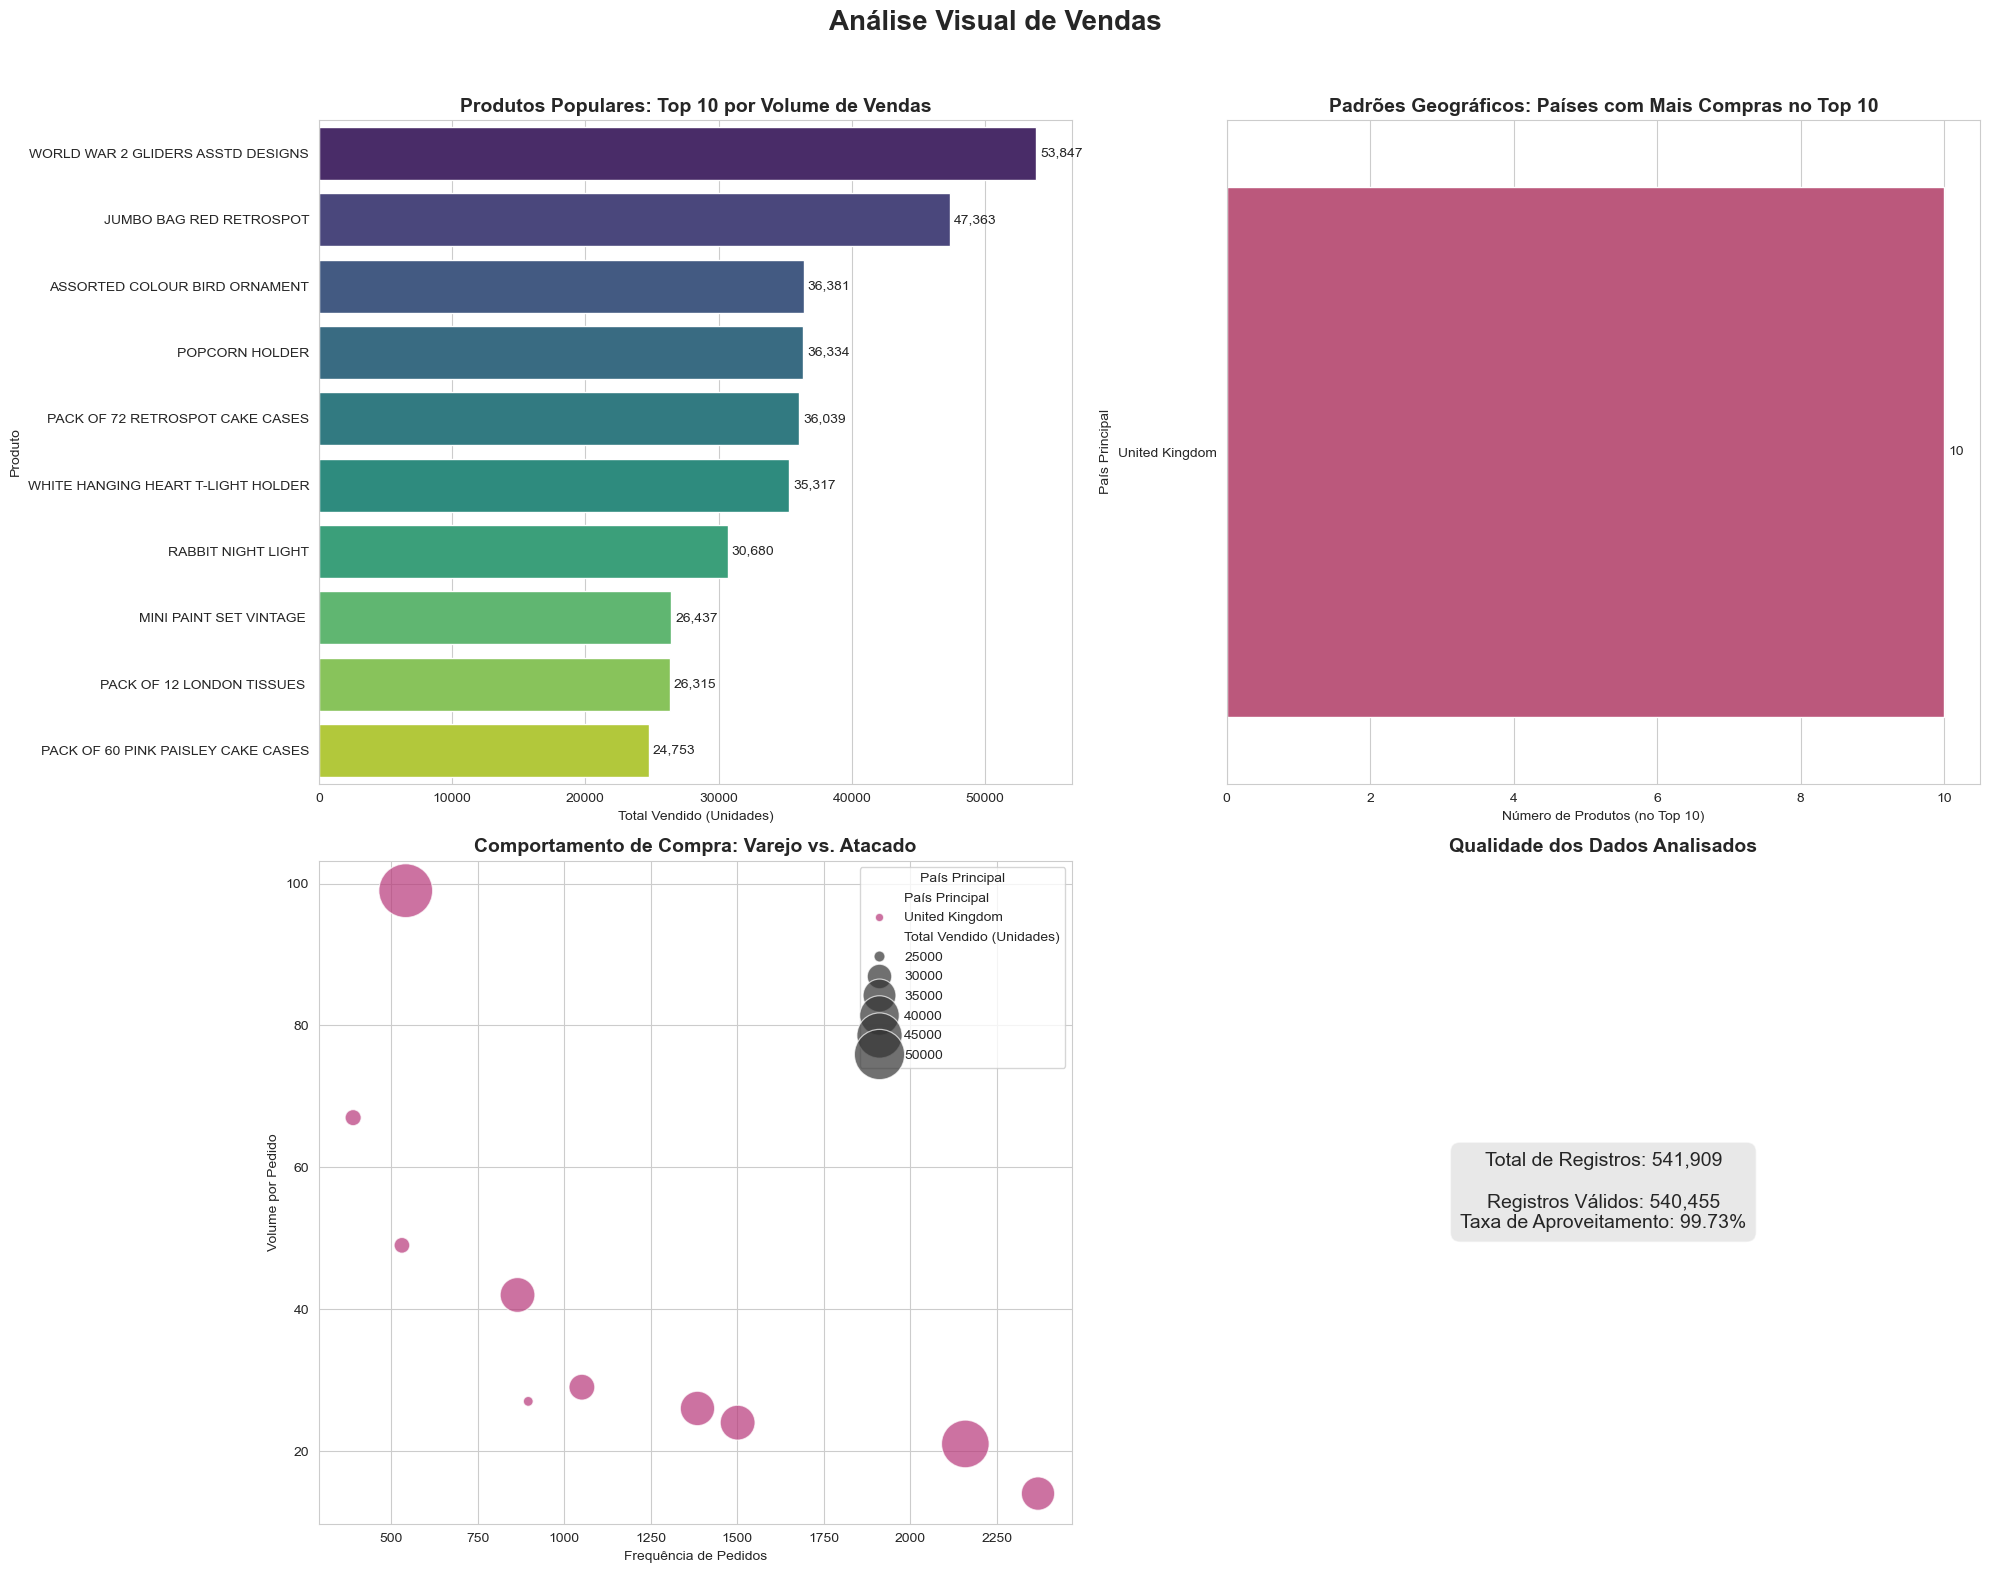

In [11]:
# Passo 1: Importar todas as bibliotecas e adicionar o comando mágico
%matplotlib inline
import pandas as pd
import os
from tabulate import tabulate
import matplotlib.pyplot as plt
import seaborn as sns

# ==============================================================================
# Função universal para gerar as visualizações
# ==============================================================================
def gerar_visualizacoes(df_resultados, salvar_arquivo=False):
    """
    Cria as visualizações.
    - Se salvar_arquivo for True, salva a imagem em um arquivo .png.
    - Se salvar_arquivo for False, exibe o gráfico no output do notebook.
    """
    # Esta parte da configuração é a mesma para ambos os casos
    sns.set_style("whitegrid")
    fig, axes = plt.subplots(2, 2, figsize=(20, 16))
    fig.suptitle('Análise Visual de Vendas', fontsize=20, weight='bold')

    # --- Gráfico 1: Top 10 Produtos ---
    ax1 = axes[0, 0]
    sns.barplot(x='Total Vendido (Unidades)', y='Produto', data=df_resultados.sort_values('Total Vendido (Unidades)', ascending=False), ax=ax1, palette='viridis')
    ax1.set_title('Produtos Populares: Top 10 por Volume de Vendas', fontsize=14, weight='bold')
    ax1.set_xlabel('Total Vendido (Unidades)'); ax1.set_ylabel('Produto')
    for container in ax1.containers: ax1.bar_label(container, fmt='{:,.0f}'.format, padding=3)

    # --- Gráfico 2: Padrões Geográficos ---
    ax2 = axes[0, 1]
    sns.countplot(y='País Principal', data=df_resultados, order=df_resultados['País Principal'].value_counts().index, ax=ax2, palette='plasma')
    ax2.set_title('Padrões Geográficos: Países com Mais Compras no Top 10', fontsize=14, weight='bold')
    ax2.set_xlabel('Número de Produtos (no Top 10)'); ax2.set_ylabel('País Principal')
    for container in ax2.containers: ax2.bar_label(container, padding=3)

    # --- Gráfico 3: Comportamento de Compra ---
    ax3 = axes[1, 0]
    sns.scatterplot(x='Número de Pedidos', y='Quantidade Média/Pedido', size='Total Vendido (Unidades)', hue='País Principal', data=df_resultados, ax=ax3, sizes=(50, 1500), alpha=0.7, palette='magma')
    ax3.set_title('Comportamento de Compra: Varejo vs. Atacado', fontsize=14, weight='bold')
    ax3.set_xlabel('Frequência de Pedidos'); ax3.set_ylabel('Volume por Pedido')
    ax3.legend(title='País Principal', loc='best')
    
    # --- Gráfico 4: Qualidade dos Dados ---
    ax4 = axes[1, 1]
    ax4.axis('off'); ax4.set_title('Qualidade dos Dados Analisados', fontsize=14, weight='bold')
    texto_qualidade = (
        f"Total de Registros: {df.shape[0]:,}\n\n"
        f"Registros Válidos: {len(df_filtered):,}\n"
        f"Taxa de Aproveitamento: {len(df_filtered)/df.shape[0]:.2%}"
    )
    ax4.text(0.5, 0.5, texto_qualidade, ha='center', va='center', fontsize=14, bbox=dict(boxstyle="round,pad=0.5", fc="lightgray", alpha=0.5))

    plt.tight_layout(rect=[0, 0, 1, 0.96])

    # --- Lógica para salvar ou exibir ---
    if salvar_arquivo:
        nome_arquivo = 'analise_visual_de_vendas.png'
        plt.savefig(nome_arquivo, dpi=150)
        print(f"\nGráfico salvo como '{nome_arquivo}'")
    else:
        # Exibe no output para que o GitHub possa renderizar
        plt.show()
    
    # Boa prática: fechar a figura para liberar memória
    plt.close(fig)

# ==============================================================================
# Início do script de análise
# ==============================================================================
caminho = r'data.csv'
if os.path.exists(caminho):
    try:
        # (O seu código de leitura e processamento de dados permanece aqui, sem alterações)
        # ...
        # ... (Vou omitir para encurtar, mas ele deve estar aqui no seu notebook)
        codificacoes = ['utf-8', 'latin1', 'iso-8859-1', 'cp1252']
        df = None
        for cod in codificacoes:
            try:
                df = pd.read_csv(caminho, encoding=cod, sep=None, engine='python')
                break
            except Exception:
                continue
        
        df.fillna('N/A', inplace=True)
        df_filtered = df[df['Description'] != 'N/A'].copy()
        df_filtered['Quantity'] = pd.to_numeric(df_filtered['Quantity'], errors='coerce')
        df_filtered.dropna(subset=['Quantity'], inplace=True)
        df_filtered['Quantity'] = df_filtered['Quantity'].astype(int)
        top_products = df_filtered.groupby('Description')['Quantity'].sum().nlargest(10)
        def get_top_country(group): return group.groupby('Country')['Quantity'].sum().idxmax()
        country_by_product = (df_filtered[df_filtered['Description'].isin(top_products.index)].groupby('Description').apply(get_top_country, include_groups=False))
        avg_quantity = df_filtered.groupby('Description')['Quantity'].mean().astype(int)
        order_count = df_filtered['Description'].value_counts()
        results = pd.DataFrame({
            'Produto': top_products.index, 'Total Vendido (Unidades)': top_products.values,
            'País Principal': top_products.index.map(country_by_product),
            'Quantidade Média/Pedido': top_products.index.map(avg_quantity),
            'Número de Pedidos': top_products.index.map(order_count)
        }).reset_index(drop=True)

        # Exibe a tabela de resultados
        print("RELATÓRIO: TOP 10 PRODUTOS MAIS VENDIDOS POR VOLUME".center(100))
        print(tabulate(results, headers='keys', tablefmt='pretty', showindex=False))

        # Salva os arquivos de dados
        results.to_csv('top10_produtos_mais_vendidos.csv', index=False, encoding='utf-8-sig')
        results.to_excel('top10_produtos_mais_vendidos.xlsx', index=False)
        print("\nResultados da tabela também foram salvos em .csv e .xlsx")
        
        # --- CHAMADAS PARA GERAR AS VISUALIZAÇÕES ---
        # 1. Salva o gráfico como um arquivo PNG no repositório
        gerar_visualizacoes(results, salvar_arquivo=True)
        
        # 2. Exibe o gráfico no notebook para que o GitHub possa mostrá-lo
        gerar_visualizacoes(results, salvar_arquivo=False)

    except Exception as e:
        print(f"\nERRO INESPERADO: {str(e)}\n")
else:
    print(f"\nERRO: Arquivo não encontrado em: {caminho}\n")